# Basic model
##### - no feature engineering

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from xgboost import XGBClassifier
from functions import ROC
seed = 42


In [171]:
# Read the data
path = "/Users/hubertmagdziak/Desktop/ML-heart-failure-prediction/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Correlation between 'time' and 'DEATH_EVENT': -0.54


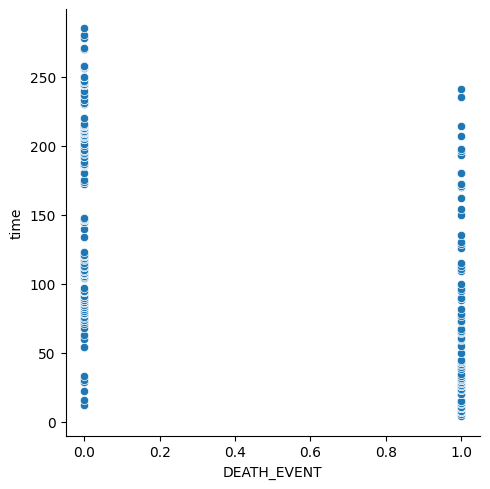

In [172]:
# Examine high correlation between "time" and "DEATH_EVENT"
sns.relplot(data=df,
            y="time",
            x="DEATH_EVENT",
            kind="scatter")

# Correlation value
print(f"Correlation between 'time' and 'DEATH_EVENT': {df[['time', 'DEATH_EVENT']].corr('spearman').values[0,1]:.2f}")

In [173]:
# Split the data into training and testing
df_modelling = df.copy()
X = df_modelling.drop(columns=["DEATH_EVENT"])
y = df_modelling["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.35,
    shuffle=True,
    stratify=y,
    random_state=seed
)

X_validate, X_test, y_validate, y_test = train_test_split(
    X_test,
    y_test,
    test_size=0.5,
    shuffle=True,
    stratify=y_test,
    random_state=seed
)
print(f"X_train shape: {X_train.shape}\n")
print(f"X_validate shape: {X_validate.shape}\n")
print(f"X_test shape: {X_test.shape}\n")
print(f"y_train shape: {y_train.shape}\n")
print(f"y_validate shape: {y_validate.shape}\n")
print(f"y_test shape: {y_test.shape}\n")

X_train shape: (194, 12)

X_validate shape: (52, 12)

X_test shape: (53, 12)

y_train shape: (194,)

y_validate shape: (52,)

y_test shape: (53,)



In [174]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)

### Basic Logistic Regression

In [175]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_elastic_net = log_reg.predict(X_validate)
y_pred_proba_elastic_net = log_reg.predict_proba(X_validate)[:,1]
print(classification_report(y_validate, y_pred_elastic_net))
print(confusion_matrix(y_validate, y_pred_elastic_net))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        35
           1       0.85      0.65      0.73        17

    accuracy                           0.85        52
   macro avg       0.85      0.79      0.81        52
weighted avg       0.85      0.85      0.84        52

[[33  2]
 [ 6 11]]


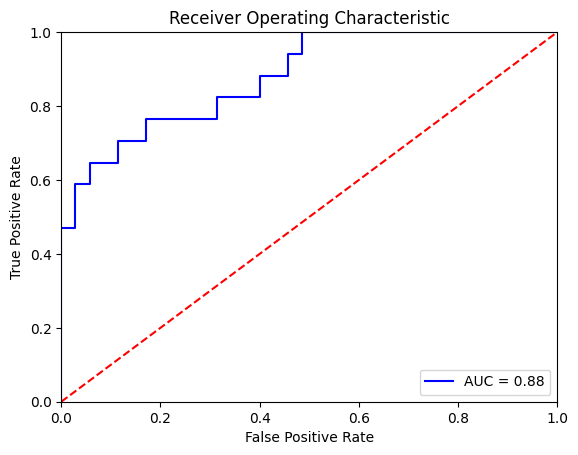

In [176]:
ROC(y_validate, y_pred_proba_elastic_net)

In [177]:
cut_off_lr = ROC(y_validate, y_pred_proba_elastic_net, return_optimal_threshold=True)
print(classification_report(y_validate, y_pred_proba_elastic_net >= cut_off_lr))

Threshold value is: 0.2852978144744931
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.68      0.76      0.72        17

    accuracy                           0.81        52
   macro avg       0.78      0.80      0.79        52
weighted avg       0.82      0.81      0.81        52



### Basic Random Forest

In [178]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_validate)
y_pred_proba_rf = rf.predict_proba(X_validate)[:,1]
print(classification_report(y_validate, y_pred_rf))
print(confusion_matrix(y_validate, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        35
           1       0.83      0.59      0.69        17

    accuracy                           0.83        52
   macro avg       0.83      0.77      0.78        52
weighted avg       0.83      0.83      0.82        52

[[33  2]
 [ 7 10]]


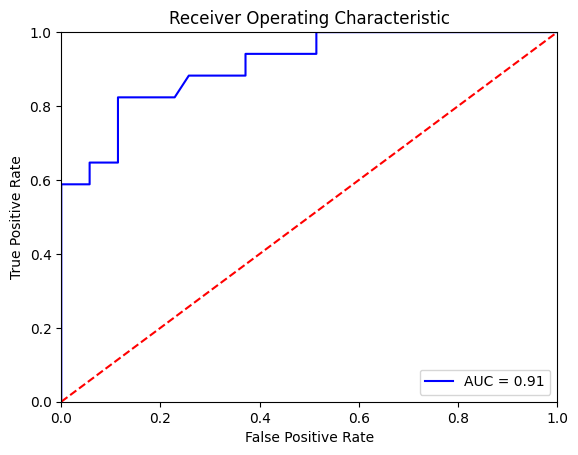

In [179]:
ROC(y_validate, y_pred_proba_rf)

In [180]:
cut_off_rf = ROC(y_validate, y_pred_proba_rf, return_optimal_threshold=True)
print(classification_report(y_validate, y_pred_proba_rf >= cut_off_rf))

Threshold value is: 0.34
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.78      0.82      0.80        17

    accuracy                           0.87        52
   macro avg       0.84      0.85      0.85        52
weighted avg       0.87      0.87      0.87        52



### Basic XGBoost

In [181]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_validate)
y_pred_proba_xgb = xgb.predict_proba(X_validate)[:, 1]
print(classification_report(y_validate, y_pred_xgb))
print(confusion_matrix(y_validate, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88        35
           1       0.79      0.65      0.71        17

    accuracy                           0.83        52
   macro avg       0.81      0.78      0.79        52
weighted avg       0.82      0.83      0.82        52

[[32  3]
 [ 6 11]]


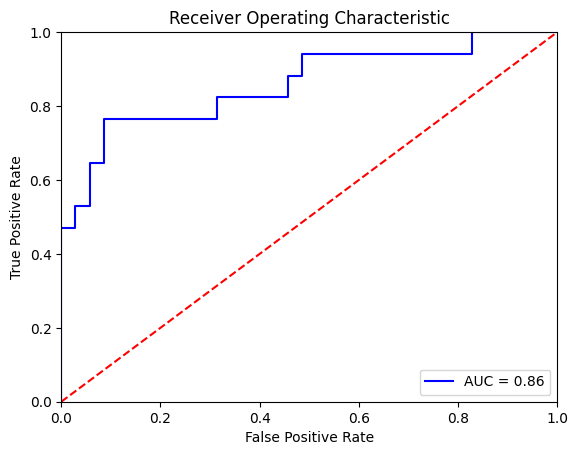

In [182]:
ROC(y_validate, y_pred_proba_xgb)

In [183]:
cut_off_xgb = ROC(y_validate, y_pred_proba_xgb, return_optimal_threshold=True)
print(classification_report(y_validate, y_pred_proba_xgb >= cut_off_xgb))

Threshold value is: 0.41815427
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.81      0.76      0.79        17

    accuracy                           0.87        52
   macro avg       0.85      0.84      0.84        52
weighted avg       0.86      0.87      0.86        52



# Compare basic models

In [194]:
# Create data frame with results
basic_models = dict()
basic_models['LogisticRegression'] = balanced_accuracy_score(y_validate, y_pred_proba_elastic_net >= cut_off_lr)
basic_models['Random Forest'] = balanced_accuracy_score(y_validate, y_pred_proba_rf >= cut_off_rf)
basic_models['XGBoost'] = balanced_accuracy_score(y_validate, y_pred_proba_xgb >= cut_off_xgb)
pd.Series(basic_models).to_frame("balanced accuracy").sort_values(by="balanced accuracy", ascending=False)

,balanced accuracy
Random Forest,0.854622
XGBoost,0.839496
LogisticRegression,0.796639
